In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
%run dnn_utils.ipynb
#%run init_utils.ipynb

In [4]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each
    layer in our network ,→
    Returns:
    parameters -- python dictionary containing your parameters "W1",
    "b1", ..., "WL", "bL": ,→
    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
    bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) 
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * np.sqrt(2./layers_dims[l-1]) 
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l],layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [5]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.
    Arguments:
    A -- activations from previous layer (or input data): (size of
    previous layer, number of examples) ,→
    W -- weights matrix: numpy array of shape (size of current layer,
    size of previous layer) ,→
    b -- bias vector, numpy array of shape (size of the current layer,
    1) ,→
    Returns:
    Z -- the input of the activation function, also called
    pre-activation parameter ,→
    cache -- a python dictionary containing "A", "W" and "b" ; stored
    for computing the backward pass efficiently ,→
    """
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [6]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer
    Arguments:
    A_prev -- activations from previous layer (or input data): (size of
    previous layer, number of examples) ,→
    W -- weights matrix: numpy array of shape (size of current layer,
    size of previous layer) ,→
    b -- bias vector, numpy array of shape (size of the current layer,
    1) ,→
    activation -- the activation to be used in this layer, stored as a
    text string: "sigmoid" or "relu" ,→
    Returns:
    A -- the output of the activation function, also called the
    post-activation value ,→
    cache -- a python dictionary containing "linear_cache" and
    "activation_cache"; ,→
    stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
# Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [7]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the
    [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation ,→
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
    every cache of linear_relu_forward() (there are L-1 of
    them, indexed from 0 to L-2) ,→
    the cache of linear_sigmoid_forward() (there is one,
    indexed L-1) ,→
    """
    caches = []
    A = X 
    L = len(parameters) // 2 # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches"list. ,→
    for l in range(1, L):
        
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' +str(l)], parameters['b' + str(l)], activation ="relu") 
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)], activation = "sigmoid") 
    caches.append(cache)


    assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [8]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).
    Arguments:
    AL -- probability vector corresponding to your label predictions,
    shape (1, number of examples) ,→
    Y -- true "label" vector (for example: containing 0 if non-cat, 1
    if cat), shape (1, number of examples) ,→
    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    # Compute loss from aL and y.
    cost = -(np.dot(Y,np.log(AL.T))+np.dot(1-Y,np.log(1-AL).T))/m
    
    cost = np.squeeze(cost) # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17). 
    assert(cost.shape == ())
    return cost

In [9]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single
    layer (layer l) ,→
    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of
    current layer l) ,→
    cache -- tuple of values (A_prev, W, b) coming from the forward
    propagation in the current layer ,→
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of
    the previous layer l-1), same shape as A_prev ,→
    dW -- Gradient of the cost with respect to W (current layer l),
    same shape as W ,→
    db -- Gradient of the cost with respect to b (current layer l),
    same shape as b ,→
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [10]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION
    layer. ,→
    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store
    for computing backward propagation efficiently ,→
    activation -- the activation to be used in this layer, stored as a
    text string: "sigmoid" or "relu" ,→
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of
    the previous layer l-1), same shape as A_prev ,→
    dW -- Gradient of the cost with respect to W (current layer l),
    same shape as W ,→
    db -- Gradient of the cost with respect to b (current layer l),
    same shape as b ,→
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
       
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [11]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1)
    -> LINEAR -> SIGMOID group ,→
    Arguments:
    AL -- probability vector, output of the forward propagation
    (L_model_forward()) ,→
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
    every cache of linear_activation_forward() with "relu"
    (it's caches[l], for l in range(L-1) i.e l = 0...L-2) ,→
    the cache of linear_activation_forward() with "sigmoid"
    (it's caches[L-1]) ,→
    Returns:
    grads -- A dictionary with the gradients
    grads["dA" + str(l)] = ...
    grads["dW" + str(l)] = ...
    grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) 
    m = AL.shape[1] 
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    # Initializing the backpropagation
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"] ,→
    
    current_cache = caches[L-1]
    
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    for l in reversed(range(L-1)):
    # lth layer: (RELU -> LINEAR) gradients.
    # Inputs: "grads["dA" + str(l + 2)], caches". Outputs:"grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] ,grads["db" + str(l + 1)]
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+2)],current_cache, "relu")
       
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads

In [12]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of
    L_model_backward ,→
    Returns:
    parameters -- python dictionary containing your updated parameters
    parameters["W" + str(l)] = ...
    76
    parameters["b" + str(l)] = ...
    """
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]

    return parameters

In [19]:
np.random.seed(1)
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [20]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

In [21]:
train_x,test_x = image2vec(train_x_orig,test_x_orig)

In [22]:
n_x = 12288 # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [23]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075,num_iterations = 3000, print_cost=False): 
    """
    Implements a two-layer neural network:
    LINEAR->RELU->LINEAR->SIGMOID. ,→
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of
    shape (1, number of examples) ,→
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100
    iterations ,→
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    np.random.seed(1)
    grads = {}
    costs = [] # to keep track of the cost
    m = X.shape[1] # number of examples
    (n_x, n_h, n_y) = layers_dims
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented ,→

    parameters =initialize_parameters(n_x, n_h, n_y)

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Loop (gradient descent)
    
    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID.        Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
       
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        # Compute cost
        
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1"
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2,"sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] todW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        # Update parameters.
        
        parameters = update_parameters(parameters, grads,learning_rate) 
   
    # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost))) 

        if print_cost and i % 100 == 0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.33942815383664127
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.17448318112556643
Cost after iteration 1600: 0.1708076297809599
Cost after iteration 1700: 0.1130652456216474
Cost after iteration 1800: 0.09629426845937158
Cost after iteration 1900: 0.0834261795972687
Cost after iteration 2000: 0.07439078704319084
Cost after iteration 2100: 0.06630748132

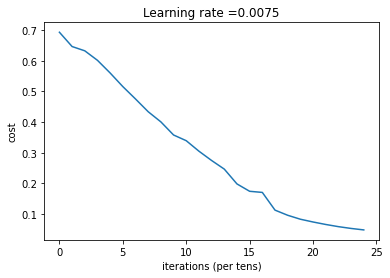

In [24]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h,n_y), num_iterations = 2500, print_cost=True)

In [32]:
layers_dims = [12288,   5, 1]

In [33]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009 ,→
    """
    Implements a L-layer neural network:
    [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px *
    num_px * 3) ,→
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of
    shape (1, number of examples) ,→
    layers_dims -- list containing the input size and each layer size,
    of length (number of layers + 1). ,→
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    Returns:
    parameters -- parameters learnt by the model. They can then be used
    to predict. ,→
    """
    np.random.seed(1)
    costs = [] # keep track of cost
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
    
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.

        cost = compute_cost(AL, Y)

        # Backward propagation.

        grads = L_model_backward(AL, Y, caches)

        # Update parameters.

        parameters = update_parameters(parameters, grads,learning_rate) 


        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        if print_cost and i % 100 == 0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.691548
Cost after iteration 100: 0.645330
Cost after iteration 200: 0.628449
Cost after iteration 300: 0.592873
Cost after iteration 400: 0.550535
Cost after iteration 500: 0.501472
Cost after iteration 600: 0.442259
Cost after iteration 700: 0.386045
Cost after iteration 800: 0.359769
Cost after iteration 900: 0.344135
Cost after iteration 1000: 0.315308
Cost after iteration 1100: 0.266718
Cost after iteration 1200: 0.212705
Cost after iteration 1300: 0.154012
Cost after iteration 1400: 0.132122
Cost after iteration 1500: 0.118874
Cost after iteration 1600: 0.102822
Cost after iteration 1700: 0.090185
Cost after iteration 1800: 0.076106
Cost after iteration 1900: 0.063993
Cost after iteration 2000: 0.051029
Cost after iteration 2100: 0.045573
Cost after iteration 2200: 0.040447
Cost after iteration 2300: 0.036075
Cost after iteration 2400: 0.032543


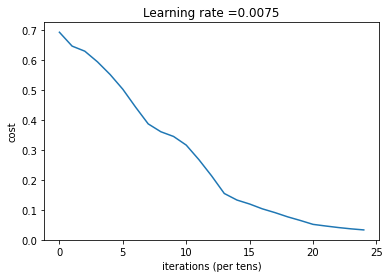

In [34]:
parameters = L_layer_model(train_x, train_y, layers_dims,num_iterations = 2500, print_cost = True)